In [127]:
# Clermont-Ferrand
#minLon, minLat, maxLon, maxLat = 3.019867, 45.722565, 3.147583, 45.803474
#Clermont_city_path = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Clermont-Ferrand\2021"


#Montpelier
#Montpelier_city_path = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Montpelier\2021"
#minLon, minLat, maxLon, maxLat = 3.800583, 43.543105 ,3.995590, 43.649763


#Grenoble
#minLon, minLat, maxLon, maxLat = 5.631866,45.145475,5.796661,45.231566
#Grenoble_city_path = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\grenoble\2021"

# Nantes
#minLon, minLat, maxLon, maxLat = -1.703568,47.159456,-1.444702,47.285295
#Nantes_city_path = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Nantes\2021"


# Rennes
minLon, minLat, maxLon, maxLat = -1.734467,48.081837,-1.544952,48.153308
Rennes_city_path = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Reims\2021"



#---------------------------------------------------------------------------------------------------------







In [128]:
import rasterio
from pyproj import Transformer

path = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Rennes\2021\B4.tif"


with rasterio.open(path) as ds:
    # Système de coordonnées de l'image
    dst_crs = ds.crs
    
    # Transformateur GPS -> projection image
    transformer = Transformer.from_crs("EPSG:4326", dst_crs, always_xy=True)
    
    # Reprojection
    x_min_m, y_min_m = transformer.transform(minLon, minLat)
    x_max_m, y_max_m = transformer.transform(maxLon, maxLat)

    # Conversion en indices pixels (col, row)
    col_min, row_max = ds.index(x_min_m, y_max_m)  # haut-gauche
    col_max, row_min = ds.index(x_max_m, y_min_m)  # bas-droit

    i = row_max
    j = col_min
    height = row_min - row_max
    width = col_max - col_min

    print("Coin haut-gauche (i, j) =", (i, j))
    print("Largeur (width) =", width)
    print("Hauteur (height) =", height)
    print("Coin bas-droit =", (i + height, j + width))


Coin haut-gauche (i, j) = (2858, 1308)
Largeur (width) = 273
Hauteur (height) = 466
Coin bas-droit = (3324, 1581)


In [129]:
j = 2858
i = 1308
width = 466
height = 273

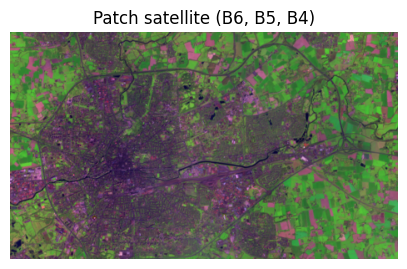

In [130]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

path_B4 = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Rennes\2021\B4.tif"
path_B5 = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Rennes\2021\B5.tif"
path_B6 = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Rennes\2021\B6.tif"

with rasterio.open(path_B4) as b4, \
     rasterio.open(path_B5) as b5, \
     rasterio.open(path_B6) as b6:

    B4 = b4.read(1)[i:i+height, j:j+width].astype(float)
    B5 = b5.read(1)[i:i+height, j:j+width].astype(float)
    B6 = b6.read(1)[i:i+height, j:j+width].astype(float)

# Normalisation pour affichage
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

rgb_patch = np.dstack([norm(B6), norm(B5), norm(B4)])

plt.figure(figsize=(5,5))
plt.imshow(rgb_patch)
plt.title("Patch satellite (B6, B5, B4)")
plt.axis("off")
plt.show()


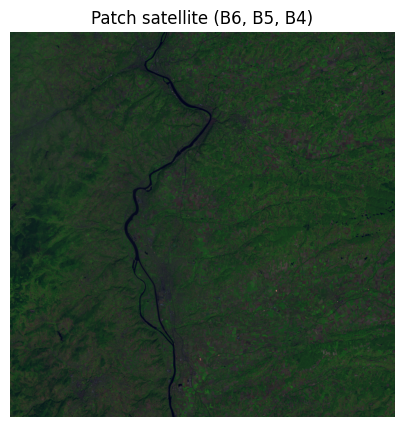

In [72]:

i = 5400
j = 4500
width = 1500
height =  1500
import rasterio
import numpy as np
import matplotlib.pyplot as plt

path_B4 = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Clermont-Ferrand\2021\B4.tif"
path_B5 = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Clermont-Ferrand\2021\B5.tif"
path_B6 = r"C:\Users\adamh\Desktop\Satelite_images\Satellite_Images\Clermont-Ferrand\2021\B6.tif"

with rasterio.open(path_B4) as b4, \
     rasterio.open(path_B5) as b5, \
     rasterio.open(path_B6) as b6:

    B4 = b4.read(1)[i:i+height, j:j+width].astype(float)
    B5 = b5.read(1)[i:i+height, j:j+width].astype(float)
    B6 = b6.read(1)[i:i+height, j:j+width].astype(float)

# Normalisation pour affichage
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

rgb_patch = np.dstack([norm(B6), norm(B5), norm(B4)])

plt.figure(figsize=(5,5))
plt.imshow(rgb_patch)
plt.title("Patch satellite (B6, B5, B4)")
plt.axis("off")
plt.show()

